In [1]:
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt 
import numpy as np
import os
import pandas as pd 
import matplotlib.pyplot as plt

from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE, ADASYN

from collections import Counter

from keras.models import Sequential
from keras.layers import Dense,Dropout
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils

from sklearn import tree
from sklearn.svm import LinearSVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score

import graphviz

/Users/dweepa/anaconda/lib/python3.6/site-packages/h5py/__init__.py:34: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [2]:
data = pd.read_csv("../Dataset/f1.csv",low_memory=False)
data.drop(['Unnamed: 0','Unnamed: 0.1'],axis=1, inplace=True)
data.head()

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,case_status,class_of_admission
0,1.094560,-1.007451,1.477034,-2.726029,-0.646306,-0.225530,-0.126067,0.255027,-0.541950,-0.288255,...,-0.163190,0.257839,-0.024023,0.249227,0.382458,0.547640,0.387264,-0.294953,1,2
1,-1.080684,-0.807437,0.202984,-0.370354,0.322429,-0.142680,0.130592,0.249193,0.023892,-0.474353,...,-0.016310,-0.063399,0.079390,-0.069294,0.133362,-0.028788,0.109325,0.219400,1,2
2,-0.452603,-1.837331,-0.169052,-0.529652,0.022990,0.208882,-0.429484,-0.117606,0.815384,-0.397514,...,0.046443,0.196740,0.025413,0.045048,0.685475,-0.002337,-0.195084,0.553738,0,2
3,-2.309276,-2.994355,0.824523,-0.778125,-0.011338,-0.096398,-0.372291,1.424843,1.928860,-4.085369,...,-0.538538,-0.157673,-0.764277,-1.419649,-0.568644,2.337575,5.432359,-0.541657,0,2
4,1.596290,0.256426,0.062521,-0.713963,-1.461713,-0.325436,0.242211,1.061015,-0.738684,-0.388059,...,0.000793,0.170814,0.122744,-0.063880,0.192708,0.404975,0.256948,0.065180,0,2


In [3]:
y=data['case_status']
data1=data.drop(['case_status',],axis=1)
X=data1

## Splitting into testing and training and oversampling '0's

In [4]:
X_train1, X_test1, y_train1, y_test1 = train_test_split(X,y, test_size=0.2)

In [5]:
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(X_train1, y_train1)
print(sorted(Counter(y_resampled).items()))

[(0, 5255), (1, 5255)]


In [6]:
X_train = X_resampled
y_train= y_resampled

In [7]:
print('Train samples count')
a = [i for i in y_train if i==0]
print('0',len(a))
print('1',len(y_train)-len(a))

print('\nTest samples count')
a = [i for i in y_test1 if i==0]
print('0',len(a))
print('1',len(y_train1)-len(a))

Train samples count
0 5255
1 5255

Test samples count
0 74
1 5510


## Neural Networks

In [8]:
classifier = Sequential()
classifier.add(Dense(activation="relu", input_dim=X_train.shape[1], units=6, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dense(activation="relu", units=10, kernel_initializer="uniform"))
classifier.add(Dropout(0.5))
classifier.add(Dense(activation="relu", units=1, kernel_initializer="uniform"))
classifier.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])
classifier.fit(X_train, y_train, batch_size = 100, epochs = 30,verbose=0)

In [9]:
score= classifier.evaluate(X_test1,y_test1)
print(score)

1396/1396 [==============================] - 0s 80us/step
[0.7165411934470037, 0.5508595991954421]


In [10]:
y_pred=classifier.predict(X_test1)
tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round(),labels=[1,0]).ravel()
precision = tp/(tp+fp)
recall = tp/(tp+fn)
fmeasure = 2*((precision*recall)/(precision+recall))

### does not predict everything as '1'

In [11]:
l=len([i for i in y_pred.round() if i==0])
l

625

## Other Models

In [12]:
seed = 7
# prepare models
models = []
models.append(('Logistic Regression', LogisticRegression()))
models.append(('Linear Discriminant Analysis', LinearDiscriminantAnalysis()))
models.append(('K Nearest Neighbours', KNeighborsClassifier()))
models.append(('Decision Trees', DecisionTreeClassifier()))
models.append(('Naive Bayes', GaussianNB()))
#models.append(('Support Vector Machine', SVC()))
# evaluate each model in turn
results = []
names = []
scoring = 'accuracy'

In [13]:
modellist=[]
for name, model in models:
    try:
        model.fit(X_train,y_train)
        y_pred = model.predict(X_test1)
        cv_results = round(model.score(X_test1,y_test1),2)
        tn, fp, fn, tp = confusion_matrix(y_test1,y_pred.round(),labels=[1,0]).ravel()
        print(tn, fp, fn, tp)
        precision = round(tp/(tp+fp),2)
        recall = round(tp/(tp+fn),2)
        fmeasure = round(2*((precision*recall)/(precision+recall)),2)
        msg = [name, precision, recall, fmeasure, cv_results]
        modellist.append(msg)
        print(msg)
        print(confusion_matrix(y_test1,y_pred.round(),labels=[0,1]))
    except:
        print(name)


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


987 335 34 40
['Logistic Regression', 0.11, 0.54, 0.18, 0.74]
[[ 40  34]
 [335 987]]
986 336 36 38
['Linear Discriminant Analysis', 0.1, 0.51, 0.17, 0.73]
[[ 38  36]
 [336 986]]


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


1156 166 44 30
['K Nearest Neighbours', 0.15, 0.41, 0.22, 0.85]
[[  30   44]
 [ 166 1156]]
1244 78 58 16
['Decision Trees', 0.17, 0.22, 0.19, 0.9]
[[  16   58]
 [  78 1244]]
884 438 35 39
['Naive Bayes', 0.08, 0.53, 0.14, 0.66]
[[ 39  35]
 [438 884]]


In [14]:
modellist.append(['Neural Networks', round(precision,2), round(recall,2), round(fmeasure,2), round(cv_results,2)])
df = pd.DataFrame(modellist)
df.columns=['Model','Precision','Recall','f-measure','Accuracy']

In [15]:
df

,Model,Precision,Recall,f-measure,Accuracy
0,Logistic Regression,0.11,0.54,0.18,0.74
1,Linear Discriminant Analysis,0.10,0.51,0.17,0.73
2,K Nearest Neighbours,0.15,0.41,0.22,0.85
3,Decision Trees,0.17,0.22,0.19,0.90
4,Naive Bayes,0.08,0.53,0.14,0.66
5,Neural Networks,0.08,0.53,0.14,0.66


In [16]:
df_test = df

# Validation Accuracy 

In [17]:
modellist=[]
for name, model in models:
    try:
        scores = cross_val_score(model, X,y, cv=5)
        names.append(name)
        msg = [name, round(scores.mean(),2),scores.std()]
        modellist.append(msg)
        print(msg)
    except:
        print("Error: ",name)

/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs

['Logistic Regression', 0.94, 0.0017031092273102303]


/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")
/Users/dweepa/anaconda/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


['Linear Discriminant Analysis', 0.94, 0.001173849728752943]
['K Nearest Neighbours', 0.94, 0.0017409293291480597]
['Decision Trees', 0.89, 0.013292838285186199]
['Naive Bayes', 0.74, 0.19074420054227606]


In [18]:
df = pd.DataFrame(modellist)
df.columns=['Model','Mean Validation Score','Std Dev of validation score']
df_validation = df

In [19]:
df_validation

,Model,Mean Validation Score,Std Dev of validation score
0,Logistic Regression,0.94,0.001703
1,Linear Discriminant Analysis,0.94,0.001174
2,K Nearest Neighbours,0.94,0.001741
3,Decision Trees,0.89,0.013293
4,Naive Bayes,0.74,0.190744


In [20]:
df_test

,Model,Precision,Recall,f-measure,Accuracy
0,Logistic Regression,0.11,0.54,0.18,0.74
1,Linear Discriminant Analysis,0.10,0.51,0.17,0.73
2,K Nearest Neighbours,0.15,0.41,0.22,0.85
3,Decision Trees,0.17,0.22,0.19,0.90
4,Naive Bayes,0.08,0.53,0.14,0.66
5,Neural Networks,0.08,0.53,0.14,0.66


# print decision trees

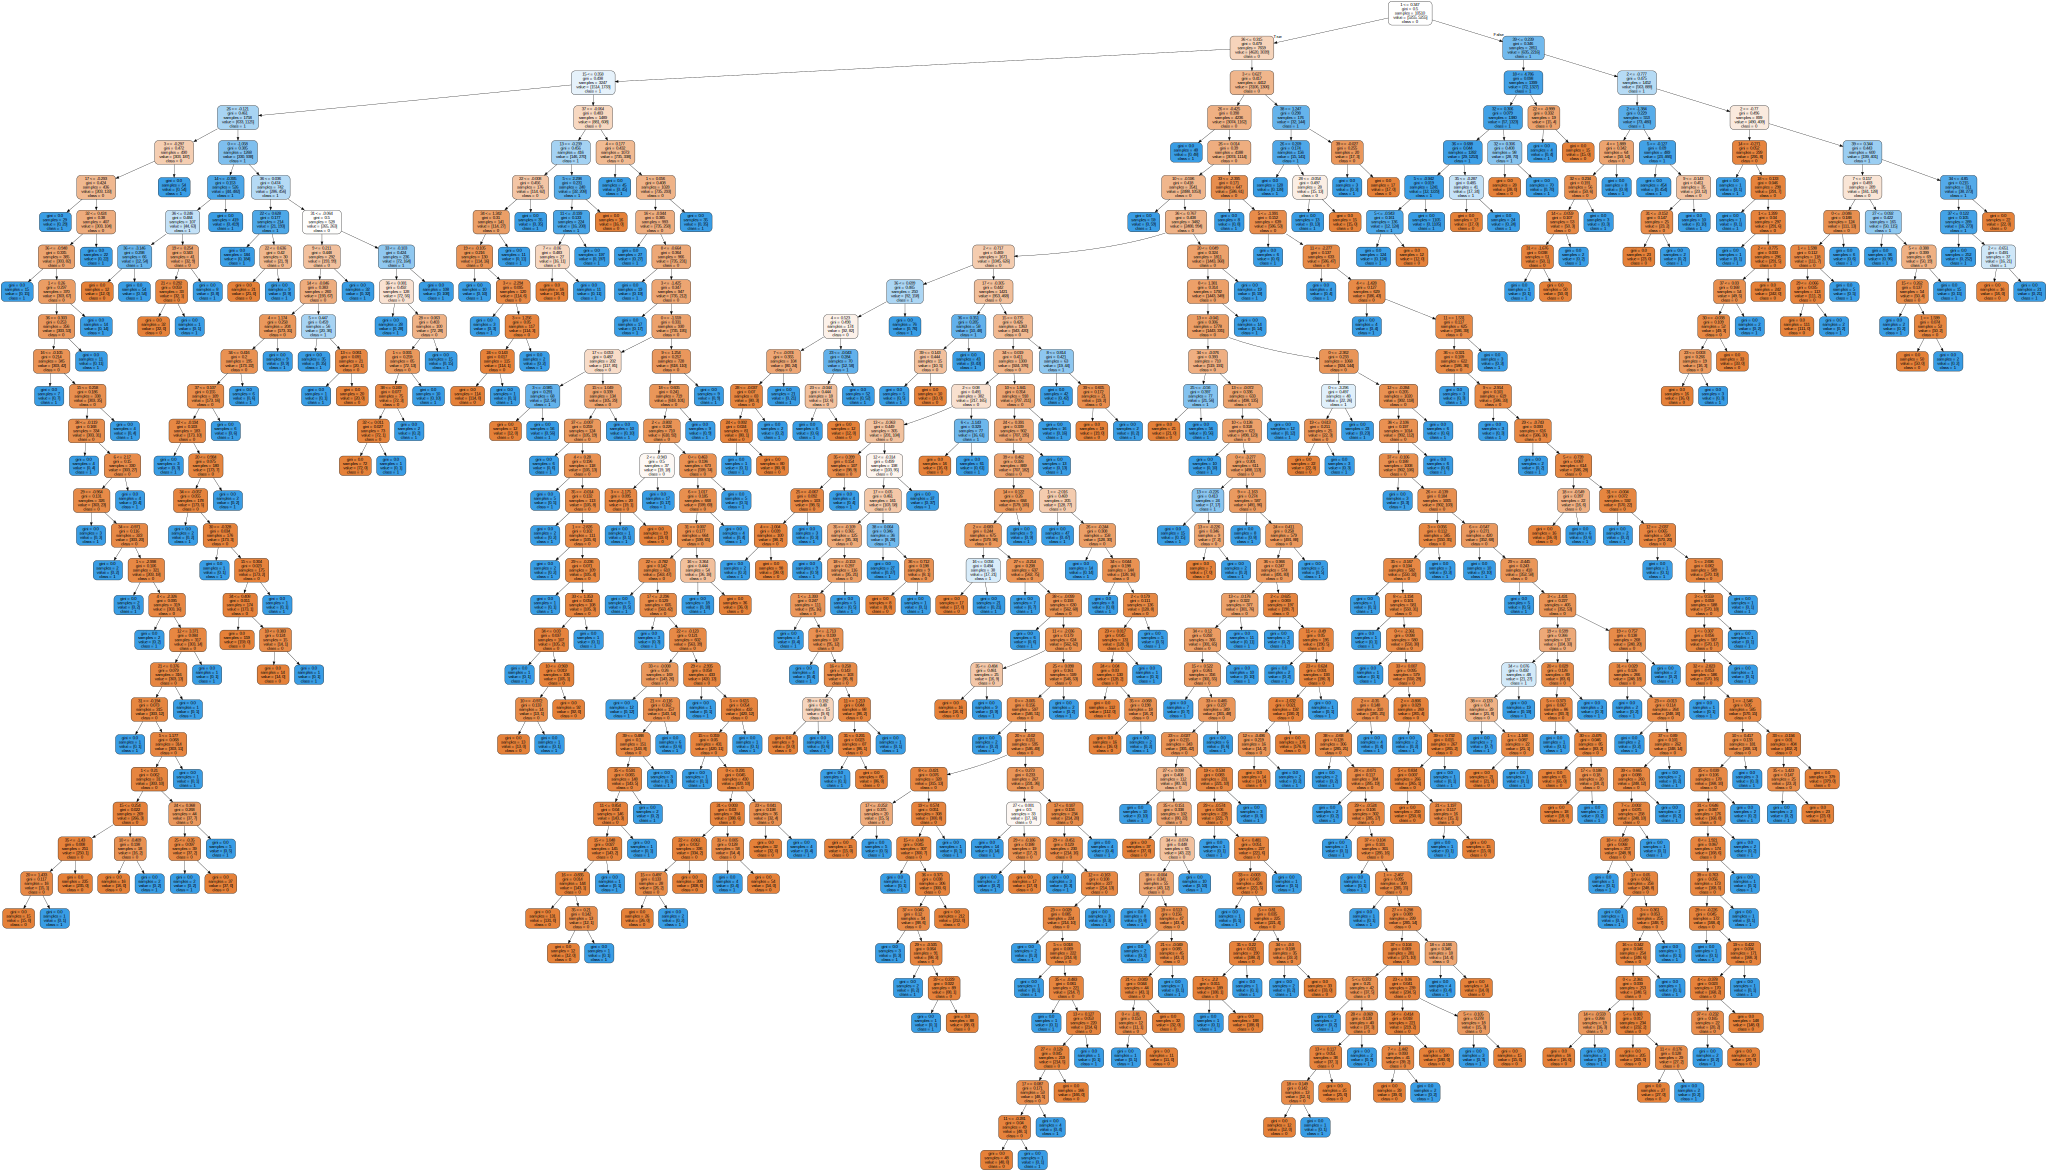

In [21]:
clf = DecisionTreeClassifier()
clf = clf.fit(X_train, y_train)
clf.predict(X_test1)
clf.score(X_test1,y_test1)
yu=['0','1']
dot_data = tree.export_graphviz(clf,feature_names=list(X.columns),class_names=yu, filled=True, rounded=True)#,out_file='tree.dot')
graph = graphviz.Source(dot_data) 
graph

In [22]:
graph.render('../DecisionTree/DecisionTreeF1.gv', view=True)  

'../DecisionTree/DecisionTreeF1.gv.pdf'